# BEE 4750 Homework 2: Dissolved Oxygen

**Name**: Emma Rose Connolly

**ID**: erc76

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Desktop/classes/Semester 5/BEE 4750/homework/hw02-Erc03`


In [2]:
using Plots
using LaTeXStrings
using Distributions

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.55 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [3]:
#model for DO concentration

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

#waste stream 1

#distance
x1 = 0:1:15000 #km 
x2 = 15001:1:50000 #km  

#constants
kc = 0.35 #1/day
kn = 0.25 #1/day
ka = 0.55 #1/day
Cs = 10 #mg/L

#River Parameters
Cr = 7.5 #mg/L; DO river
Br = 5 #mg/L; CBOD river
Nr = 5 #mg/L; NBOD river
U = 6000 #m/day; river velocity
Qr = 100000 #m^3/day; river inflow

#Waste Stream 1 Values
C1 = 5 #mg/L
Q1 = 10000 #m^3/day
N1 = 35 #mg/L
B1 = 50 #mg/L

#Waste Stream 2 Values
C2 = 5 #mg/L
Q2 = 15000 #m^3/day
N2 = 35 #mg/L
B2 = 45 #mg/L
Qr1 = Qr + Q1 #m^3/day

#first waste stream values
C01 = (Cr*Qr + C1*Q1)/(Qr + Q1) #mg/L
B01 = (Br*Qr + B1*Q1)/(Qr + Q1) #mg/L
N01 = (Nr*Qr + N1*Q1)/(Qr + Q1) #mg/L

#DO Steam 1 
C1 = (y -> dissolved_oxygen(y, Cs, C01, B01, N01, ka, kc, kn, U)).(x1)

#finding values at 15000 m downstream
B15 = B01 * exp((-1*kc*15000)/U)
N15 = N01 * exp((-1*kn*15000)/U)
C15 = C1[15001]

#second waste stream values
C02 = (C15*Qr1 + C2*Q2)/(Qr1 + Q2) #mg/L
B02 = (B15*Qr1 + B2*Q2)/(Qr1 + Q2) #mg/L
N02 = (N15*Qr1 + N2*Q2)/(Qr1 + Q2) #mg/L

C2 = (y -> dissolved_oxygen(y, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)

#create list that combines all DO values
C_all = append!(C1,C2)


#finding max DO values
DOmax = -1000000 #set DO value very low prior to iterating through all data
i = 0 #setting index at 0
max_distance = 0 #set the max distance to 0 before iterating
for i in 1:length(C_all)
    DOindex = C_all[i] #index DO is DO value at x=i 
    if DOindex > DOmax
        DOmax = DOindex 
        max_distance = i #max value for dist. will become x=i 
    end
end

distancedownstream = max_distance - 1 #needed because the distances start at 0, not 1

#print statements 
println("The maximum dissolved oxygen level is  ", DOmax, " mg/L")
println("This is found  ", distancedownstream, "m downstream.")


The maximum dissolved oxygen level is  8.530189091235808 mg/L
This is found  50000m downstream.


The maximum dissolved oxygen present is 8.53 mg/L at 50 km downstream. 

### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

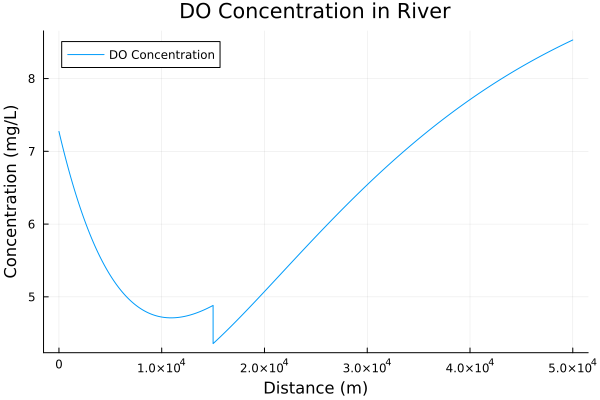

In [4]:
using Plots
x = 0:1:50000
plot(x,C_all, title="DO Concentration in River", label="DO Concentration")
xlabel!("Distance (m)")
ylabel!("Concentration (mg/L)")

When looking at the plot of the concentration in the river, I notice there is a decline in the DO concentration at the dsicharge point of 

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

In [5]:
#finding where DO becomes 6 mg/L in wastestream 2
i= 15002
DO6dist = 0 
distance = 0
# while loop
while i <= length(C_all) 
    # Assigning value to object
    global distance = i
    if C_all[i] >= 6
        global DO6dist = distance #max value for dist. will become x=i 
        break
    else
        global i = i + 1
    end
      
# Ending Loop
end

#print statements 
println("The concentration becomes 6 mg/L ", DO6dist-15000, "m downstream of the second waste stream and ", DO6dist, "m downstream of the intial ")

The concentration becomes 6 mg/L 11164m downstream of the second waste stream and 26164m downstream of the intial 


### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.


I consulted with my classmate, Teagan Smith.